Load Dataset


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/synthetic_transport_data.csv")
df.head()


,hour,day_of_week,is_weekend,route_id,stop_sequence,distance_to_next_stop_km,traffic_level,rain_flag,passenger_count,bus_capacity,actual_travel_time_min,crowding_level
0,6,3,False,15,11,2.45,2,0,25,50,7.852689,Medium
1,20,3,False,8,8,2.13,1,0,37,50,8.771111,Medium
2,9,3,False,16,14,0.73,2,0,46,50,7.447772,High
3,4,2,False,7,5,1.63,1,1,30,50,5.746640,Medium
4,20,1,False,20,12,1.60,1,0,33,50,8.111272,Medium


Dataset Overview

In [2]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   hour                      20000 non-null  int64  
 1   day_of_week               20000 non-null  int64  
 2   is_weekend                20000 non-null  bool   
 3   route_id                  20000 non-null  int64  
 4   stop_sequence             20000 non-null  int64  
 5   distance_to_next_stop_km  20000 non-null  float64
 6   traffic_level             20000 non-null  int64  
 7   rain_flag                 20000 non-null  int64  
 8   passenger_count           20000 non-null  int64  
 9   bus_capacity              20000 non-null  int64  
 10  actual_travel_time_min    20000 non-null  float64
 11  crowding_level            20000 non-null  object 
dtypes: bool(1), float64(2), int64(8), object(1)
memory usage: 1.7+ MB


,hour,day_of_week,route_id,stop_sequence,distance_to_next_stop_km,traffic_level,rain_flag,passenger_count,bus_capacity,actual_travel_time_min
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000
mean,11.425300,2.982650,10.559550,7.450850,1.753897,1.851350,0.153300,33.616250,50.0,7.590545
std,6.947779,1.998487,5.750531,4.021989,0.719748,0.793653,0.360285,9.116679,0.0,2.500707
min,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,0.000000,6.000000,50.0,2.000000
25%,5.000000,1.000000,6.000000,4.000000,1.130000,1.000000,0.000000,27.000000,50.0,5.814697
50%,11.000000,3.000000,11.000000,7.000000,1.750000,2.000000,0.000000,33.000000,50.0,7.472581
75%,17.000000,5.000000,16.000000,11.000000,2.380000,3.000000,0.000000,41.000000,50.0,9.286716
max,23.000000,6.000000,20.000000,14.000000,3.000000,3.000000,1.000000,50.000000,50.0,16.192351


ETA vs Hour of Day

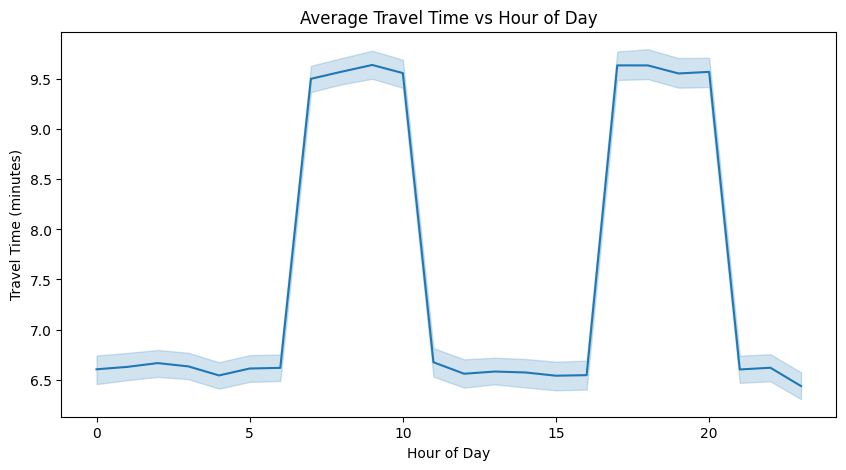

In [3]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="hour", y="actual_travel_time_min")
plt.title("Average Travel Time vs Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Travel Time (minutes)")
plt.show()


Traffic Level Impact on ETA

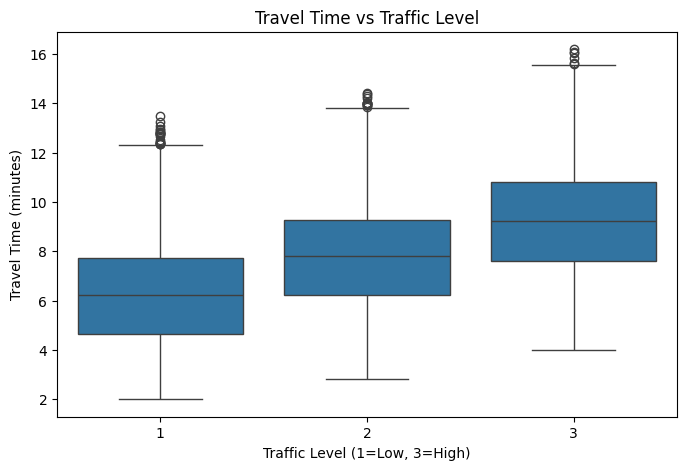

In [4]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="traffic_level", y="actual_travel_time_min")
plt.title("Travel Time vs Traffic Level")
plt.xlabel("Traffic Level (1=Low, 3=High)")
plt.ylabel("Travel Time (minutes)")
plt.show()


Rain Impact

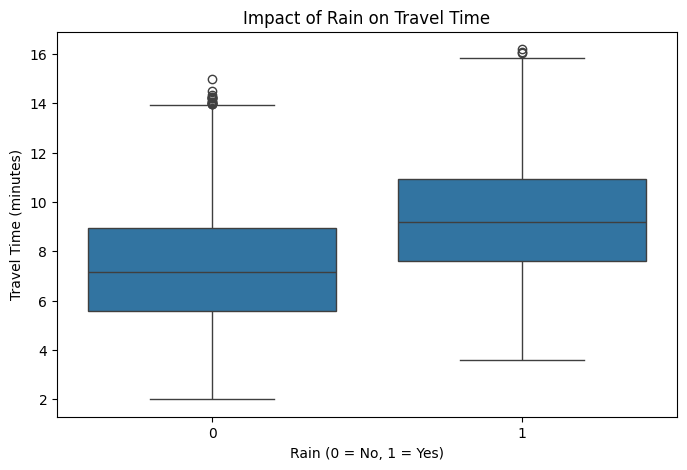

In [5]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="rain_flag", y="actual_travel_time_min")
plt.title("Impact of Rain on Travel Time")
plt.xlabel("Rain (0 = No, 1 = Yes)")
plt.ylabel("Travel Time (minutes)")
plt.show()


Crowding vs Hour

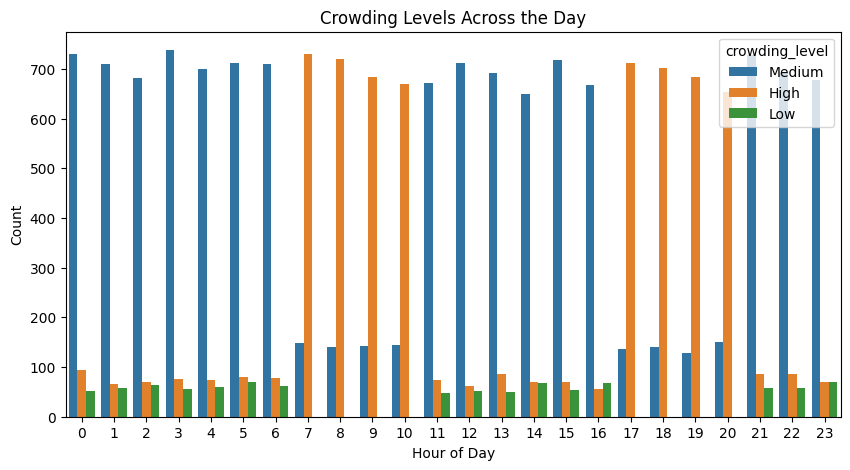

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="hour", hue="crowding_level")
plt.title("Crowding Levels Across the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.show()


Feature Correlation

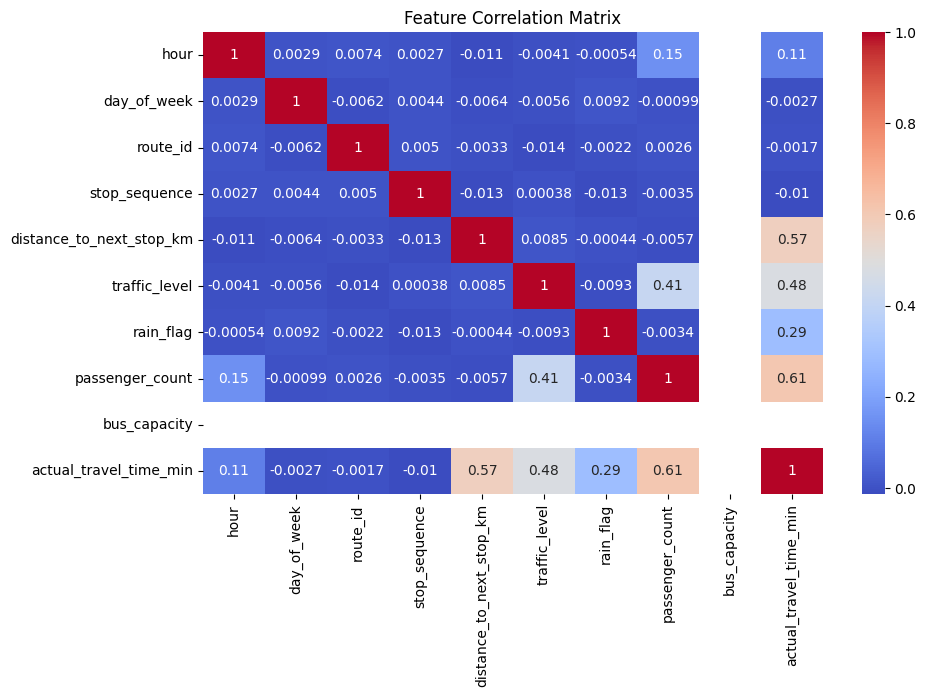

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(
    df.select_dtypes(include=["int64", "float64"]).corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Feature Correlation Matrix")
plt.show()
